In [1]:
from nfoursid.kalman import Kalman
from nfoursid.nfoursid import NFourSID
from nfoursid.state_space import StateSpace

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
NUM_TRAINING_DATAPOINTS = 1000  # create a training-set by simulating a state-space model with this many datapoints
NUM_TEST_DATAPOINTS = 20  # same for the test-set
INPUT_DIM = 3
OUTPUT_DIM = 2
INTERNAL_STATE_DIM = 4  # actual order of the state-space model in the training- and test-set
NOISE_AMPLITUDE = .1  # add noise to the training- and test-set
FIGSIZE = 8


In [4]:
A = np.array([
    [1,  .01,    0,   0],
    [0,    1,  .01,   0],
    [0,    0,    1, .02],
    [0, -.01,    0,   1],
]) / 1.01
B = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [0, 1, 1],
]
) / 3
C = np.array([
    [1, 0, 1,  1],
    [0, 0, 1, -1],
])
D = np.array([
    [1, 0, 1],
    [0, 1, 0]
]) / 10


In [5]:

state_space = StateSpace(A, B, C, D)
for _ in range(NUM_TRAINING_DATAPOINTS):
    input_state = np.random.standard_normal((INPUT_DIM, 1))
    noise = np.random.standard_normal((OUTPUT_DIM, 1)) * NOISE_AMPLITUDE


AxisError: axis 2 is out of bounds for array of dimension 1

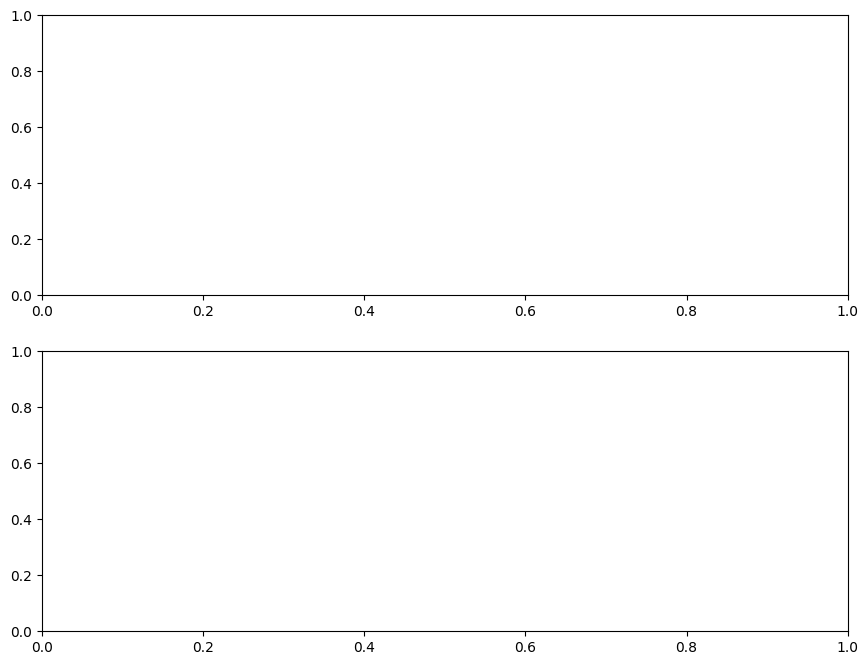

In [6]:

figsize = (1.3 * FIGSIZE, FIGSIZE)
fig = plt.figure(figsize=figsize)
state_space.plot_input_output(fig)  # the state-space model can plot its inputs and outputs
fig.tight_layout()


In [8]:

nfoursid = NFourSID(
    state_space.to_dataframe(),  # the state-space model can summarize inputs and outputs as a dataframe
    output_columns=state_space.y_column_names,
    input_columns=state_space.u_column_names,
    num_block_rows=10
)
nfoursid.subspace_identification()


AxisError: axis 2 is out of bounds for array of dimension 1

AxisError: axis 2 is out of bounds for array of dimension 1